# Chapter 4

### Exploring Data with Graphs

Key takeaways:

    - We can use scatterplots to show the relationships between two or 3 variables
        Hue, jitter help us visualize categorical vars
    - Histograms - let us visualize the distribution of a variable.
        Good for checking for outliers    
    - Kernel density plots - like a histogram, but a smoothed distribution
    - Bar charts
        The error bars on top show us a 95% confidence interval for those means  
    - Line graphs
    - Melt lets us transform a DF with cols A, B, C, with a set of values so we then get some column X with values that are the names of the columns and Y with the values that were in those columns

In [51]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [74]:
DATA_URLS = {
    'Facebook': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/FacebookNarcissism.dat',
    'Exam Anxiety': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/Exam%20Anxiety.dat',
    'Festival': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/DownloadFestival.dat',
    'Movie': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/ChickFlick.dat',
    'Hiccups': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/Hiccups.dat'
}


df_fb = pd.read_csv(DATA_URLS['Facebook'], sep='\t')

In [ ]:
#### 4.4 The Scatterplot 

In [4]:
df_fb.head()

,id,NPQC_R_Total,Rating_Type,Rating
0,1,31.0,Attractive,2
1,1,31.0,Fashionable,2
2,1,31.0,Glamourous,2
3,1,31.0,Cool,2
4,2,37.0,Attractive,2


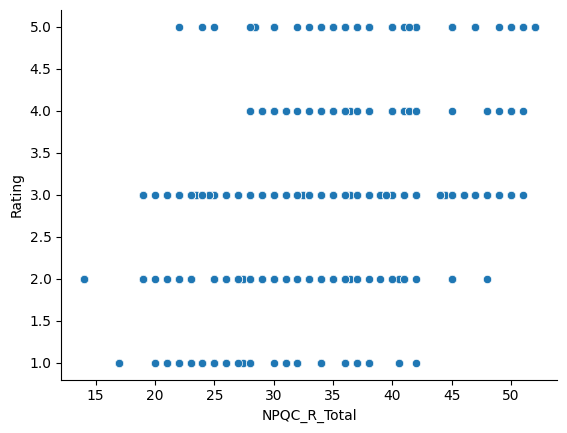

In [14]:
sns.scatterplot(x='NPQC_R_Total', y='Rating', data=df_fb)
sns.despine()

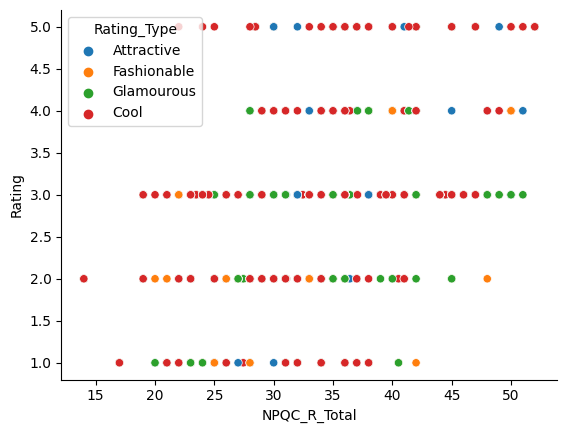

In [17]:
sns.scatterplot(x='NPQC_R_Total', y='Rating', data=df_fb, hue='Rating_Type')
sns.despine()

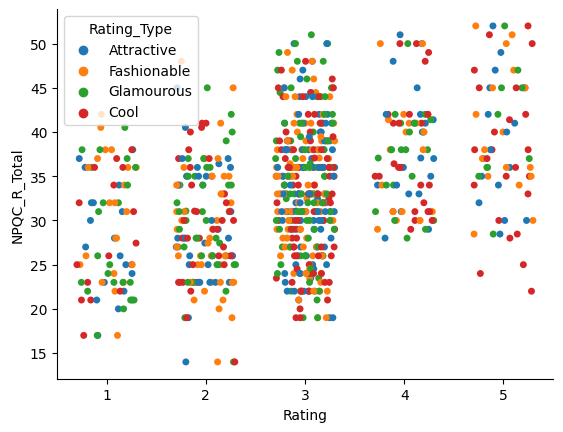

In [32]:
# Add in jitter for the plot

sns.stripplot(y='NPQC_R_Total', x='Rating', data=df_fb, hue='Rating_Type', jitter=.3)
sns.despine()

New dataset, lines of best fit: 

In [35]:
df_exam = pd.read_csv(DATA_URLS['Exam Anxiety'], sep='\t')

In [36]:
df_exam.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male


A scatter plot with the line of best fit, with a confidence interval

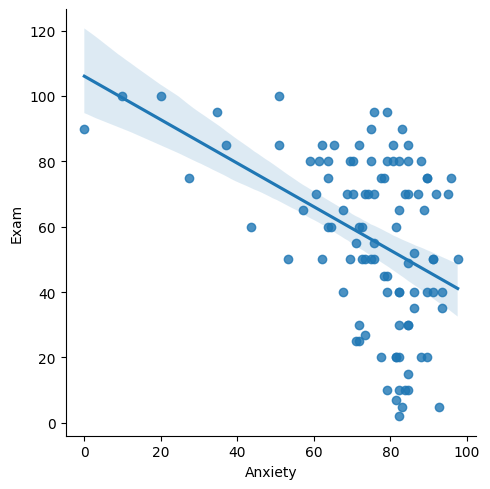

In [39]:
sns.lmplot(x='Anxiety', y='Exam', data=df_exam)
sns.despine()

Let's look at the effect of a categorical variable on our linear model -- the steeper line tells us who was more affected by exam anxiety. 

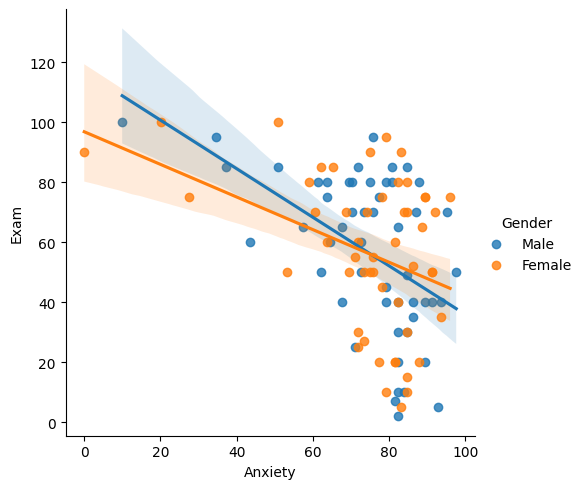

In [40]:
sns.lmplot(x='Anxiety', y='Exam', data=df_exam, hue='Gender')
sns.despine()

#### Histograms

In [44]:
df_festival = pd.read_csv(DATA_URLS['Festival'], sep='\t')

In [45]:
df_festival.head()

,ticknumb,gender,day1,day2,day3
0,2111,Male,2.64,1.35,1.61
1,2229,Female,0.97,1.41,.29
2,2338,Male,0.84,,
3,2384,Female,3.03,,
4,2401,Female,0.88,.08,


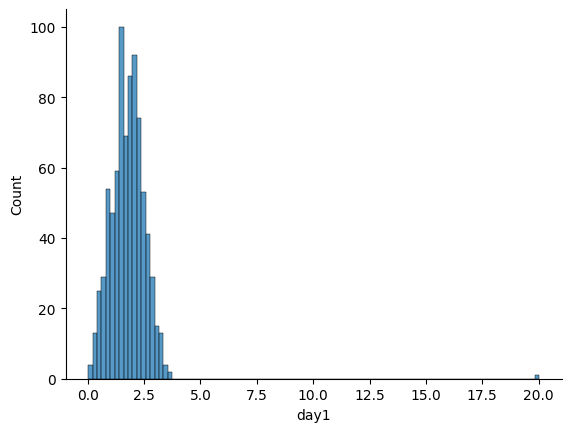

In [55]:
sns.histplot(df_festival['day1'])
sns.despine()

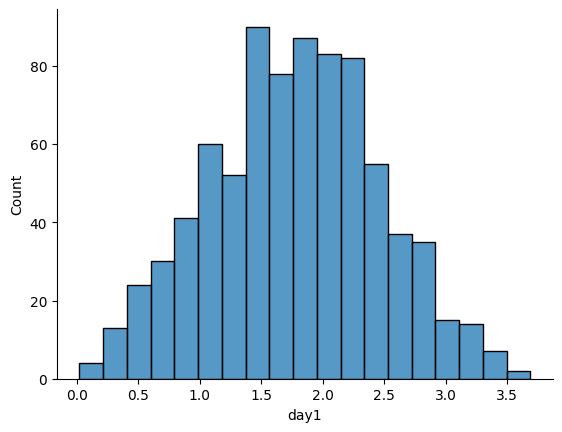

In [58]:
sns.histplot(df_festival[df_festival['day1']< 10]['day1'])
sns.despine()

Very different look once we remove the outlier

In [60]:
df_festival = df_festival[df_festival['day1'] < 10]

#### Boxplots (box and whiskers diagrams)

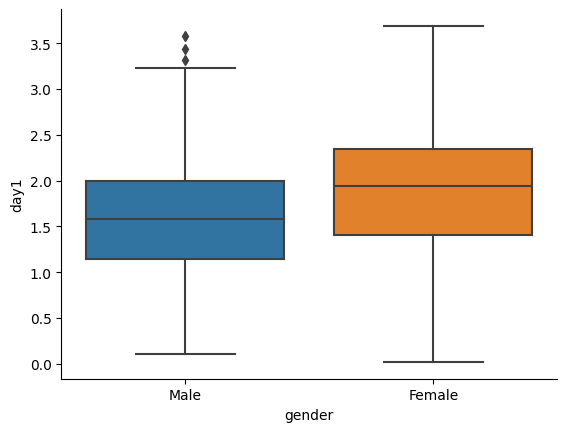

In [63]:
sns.boxplot(x='gender', y='day1', data=df_festival)
sns.despine()

Kernel density plot -- like a histogram, but smooths the distribution

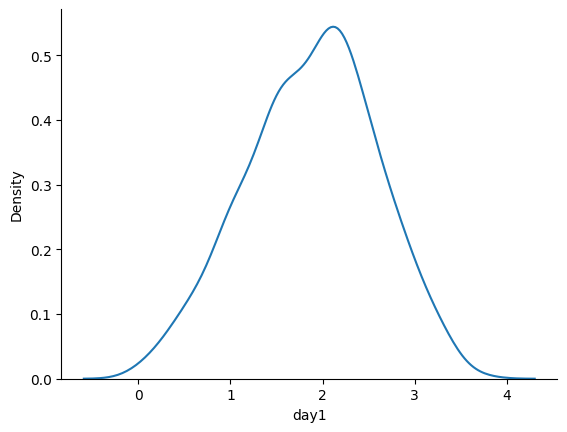

In [65]:
sns.kdeplot(data=df_festival[df_festival['gender'] == 'Female']['day1'])
sns.despine()

#### Graphing means

In [68]:
df_movie = pd.read_csv(DATA_URLS['Movie'], sep='\t')
df_movie.head()

,gender,film,arousal
0,Male,Bridget Jones' Diary,22
1,Male,Bridget Jones' Diary,13
2,Male,Bridget Jones' Diary,16
3,Male,Bridget Jones' Diary,10
4,Male,Bridget Jones' Diary,18


<Axes: xlabel='arousal', ylabel='Count'>

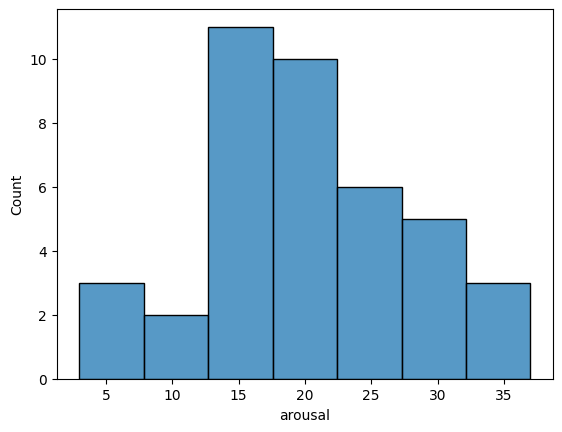

In [70]:
sns.histplot(df_movie['arousal'])

<Axes: xlabel='film', ylabel='arousal'>

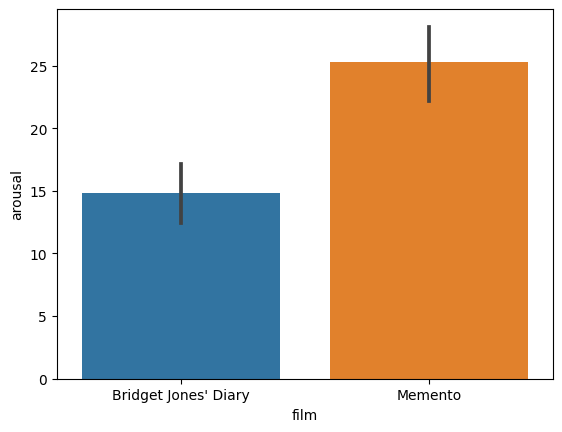

In [72]:
sns.barplot(x='film', y='arousal', data=df_movie)

<Axes: xlabel='film', ylabel='arousal'>

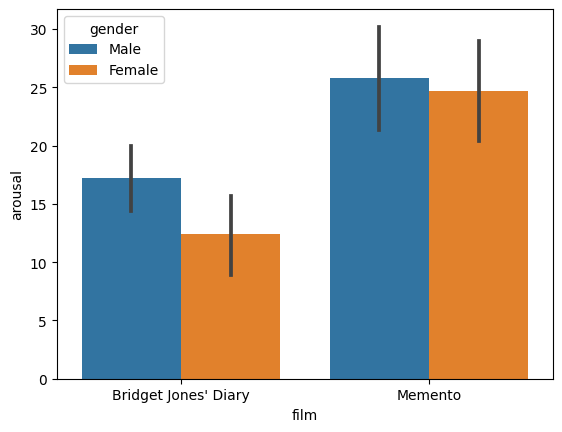

In [73]:
sns.barplot(x='film', y='arousal', hue='gender', data=df_movie)

#### Line graphs

In [89]:
df_hiccups = pd.read_csv(DATA_URLS['Hiccups'], sep='\t')

In [90]:
df_hiccups.head()

,Baseline,Tongue,Carotid,Rectum
0,15,9,7,2
1,13,18,7,4
2,9,17,5,4
3,7,15,10,5
4,11,18,7,4


Melt will let us reshape this

In [91]:
df_hiccups = pd.melt(df_hiccups)
df_hiccups.head()

,variable,value
0,Baseline,15
1,Baseline,13
2,Baseline,9
3,Baseline,7
4,Baseline,11


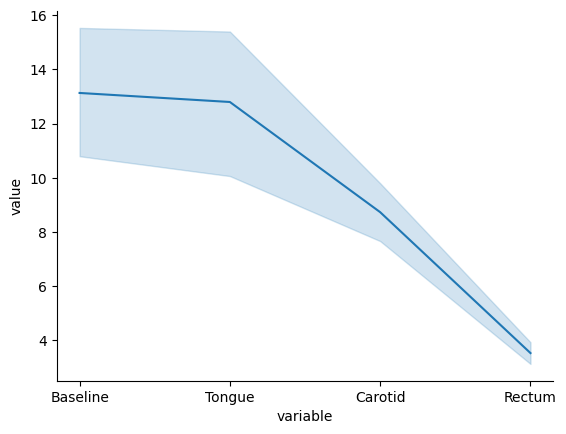

In [94]:
sns.lineplot(data=df_hiccups, y='value', x='variable', estimator='mean')
sns.despine()

- We can also have line graphs for several independent variables